In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from astropy.cosmology import Planck15
from scipy.interpolate import interp1d
from scipy.special import gamma
import numpy as np
from numpy.ma import masked_array
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import exp, sqrt
from scipy.integrate import quad, dblquad
import matplotlib.patches as patches
from itertools import product
from scipy.integrate import quad
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
import lmfit
from py_unsio import *
import os
import glob
import wkbl
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from matplotlib import rc
from StringIO import StringIO
import datetime
import scipy.ndimage as ndimage
import matplotlib.patches as mpatches
MetalFlag=0
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [63]:
path = "/data/MochimaMulti_SGP/Mo_SF1_Mechanical_Iso/output_00162"
#path = "/data/MESO/Arturo/NewSchool/Mochima/Mo_SF1_Mechanical_Iso/output_00208"

SF1ME = wkbl.Galaxy_Hound(path,virial=True)
nucenter = nbe.real_center(SF1ME.st.pos3d, SF1ME.st.mass)
SF1ME.center_shift(nucenter)
SF1ME.r_virial(600)
ok,SF1ME.st.rho,_= CF.getDensity(np.array(SF1ME.st.pos3d.reshape(len(SF1ME.st.pos3d)*3),
                                        dtype=np.float32), SF1ME.st.mass)


loading Dark matter..
loading Stars..
loading Gas..
| r_200 = 68.55
| Diagonal matrix computed 
|    | 10, 0, 0|
| D =| 0, 10, 0|
|    | 0,  0, 3|


In [95]:
path = "/data/MochimaMulti_SGP/Mo_SF1_Delayed_Iso/output_00162"
#path = "/data/MESO/Arturo/NewSchool/Mochima/Mo_SF1_"
SF1DE = wkbl.Galaxy_Hound(path,virial=True)
nucenter = nbe.real_center(SF1DE.st.pos3d, SF1DE.st.mass)
SF1DE.center_shift(nucenter)
SF1DE.r_virial(600)
ok,SF1DE.st.rho,_= CF.getDensity(np.array(SF1DE.st.pos3d.reshape(len(SF1DE.st.pos3d)*3),
                                           dtype=np.float32), SF1DE.st.mass)

loading Dark matter..
loading Stars..
loading Gas..
| r_200 = 68.55
| Diagonal matrix computed 
|    | 18, 0, 0|
| D =| 0, 15, 0|
|    | 0,  0, 3|


In [44]:
path = "/data/MochimaMulti_SGP/Mo_SF0_Delayed_Iso/output_00161"
#path = "/media/arturo/ARTUROTECA/OUTPUTS/HaloB/output_00417"
SF0DE = wkbl.Galaxy_Hound(path,virial=True)
nucenter = nbe.real_center(SF0DE.st.pos3d, SF0DE.st.mass)
SF0DE.center_shift(nucenter)
SF0DE.r_virial(600)
ok,SF0DE.st.rho,_= CF.getDensity(np.array(SF0DE.st.pos3d.reshape(len(SF0DE.st.pos3d)*3),
                                           dtype=np.float32), SF0DE.st.mass)

loading Dark matter..
loading Stars..
loading Gas..
| r_200 = 65.04
| Diagonal matrix computed 
|    | 15, 0, 0|
| D =| 0, 14, 0|
|    | 0,  0, 3|


In [6]:
sf1me = "#de1562"
sf1de = "#16a9d1"
sf0de = "#ccaa11"

# Sound Speed

<IPython.core.display.Javascript object>


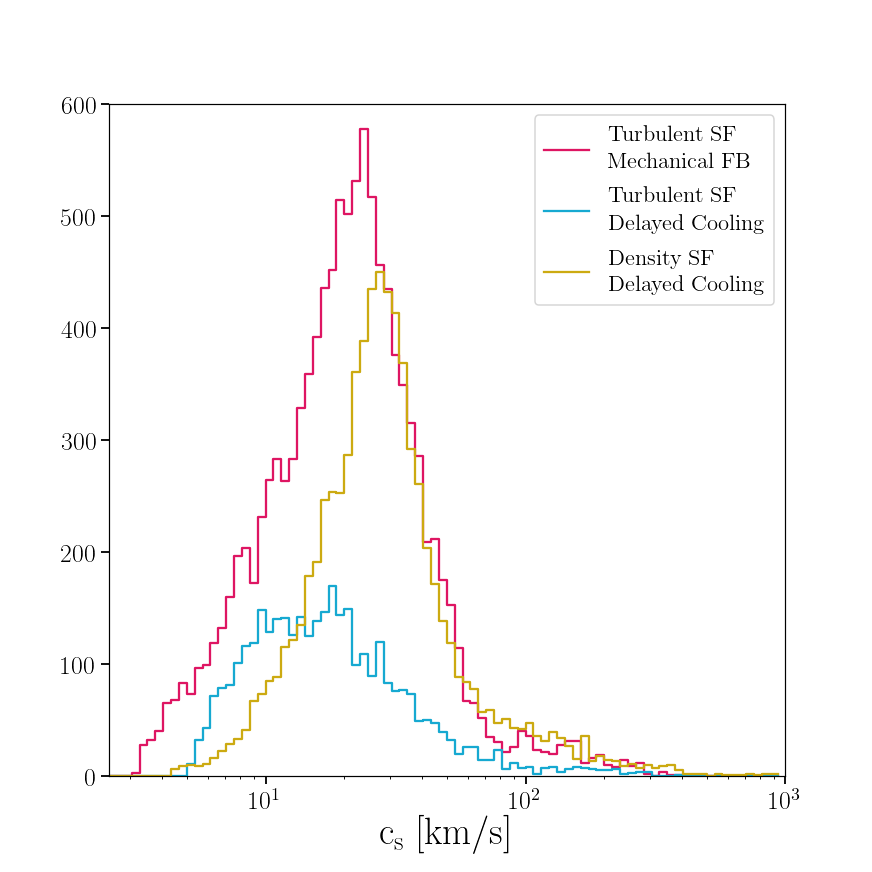

13184.07357255283 13184.07357255283


In [7]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_xscale("log")
ax.set_xlim([2.5,1e3])
ax.set_ylim([0,600])
ax.set_xlabel(r"$\rm c_s\; [km/s]$",fontsize=25)


norm=0
arr1 = np.sqrt(SF1ME.st.sf_info.cs2)
bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)
bins = np.logspace(0,3,100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='pre',c=sf1me,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Mechanical\;FB$")

arr1 = np.sqrt(SF1DE.st.sf_info.cs2)
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='pre',c=sf1de,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")


arr1 = np.sqrt(SF0DE.st.sf_info.cs2)
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

print np.nanmax(arr1), np.nanmax(arr1)
hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='pre',c=sf0de,label=r"$\rm Density\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")

legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=17, size=5,width=1.2)

<IPython.core.display.Javascript object>


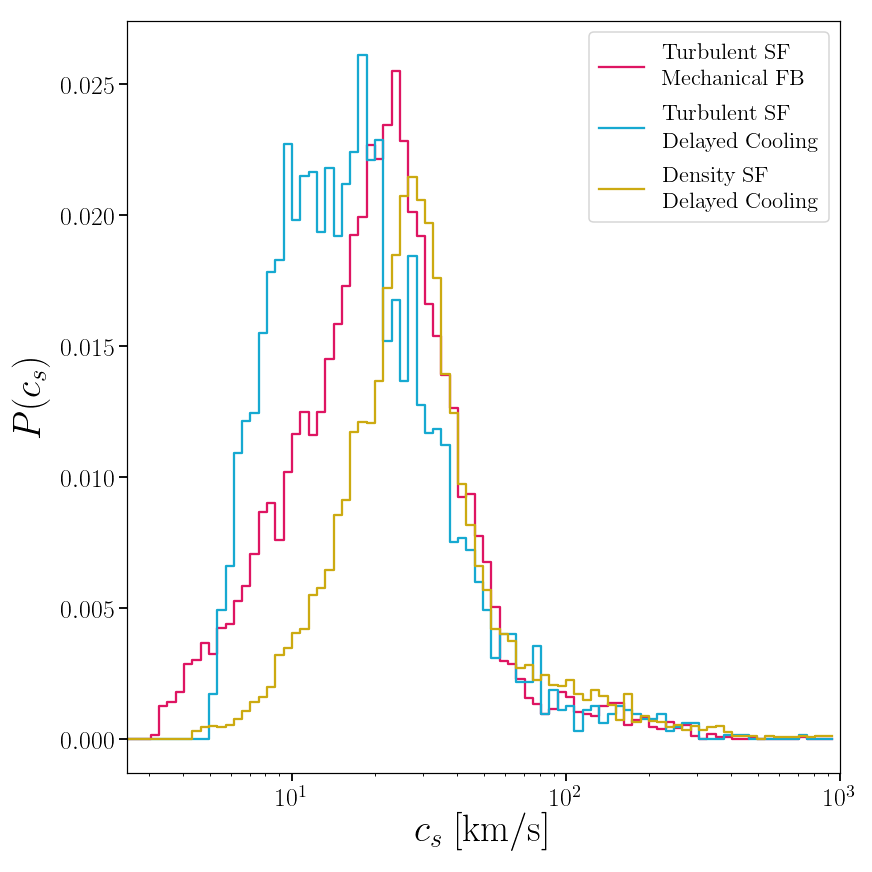

13184.07357255283 13184.07357255283


In [8]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_xscale("log")
ax.set_xlim([2.5,1e3])
#ax.set_ylim([0,600])
ax.set_xlabel(r"$ c_s\; \rm [km/s]$",fontsize=25)
ax.set_ylabel(r"$P(c_s)$",fontsize=25)


norm=1
arr1 = np.sqrt(SF1ME.st.sf_info.cs2)
bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)
bins = np.logspace(0,3,100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='pre',c=sf1me,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Mechanical\;FB$")

arr1 = np.sqrt(SF1DE.st.sf_info.cs2)
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='pre',c=sf1de,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")


arr1 = np.sqrt(SF0DE.st.sf_info.cs2)
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

print np.nanmax(arr1), np.nanmax(arr1)
hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='pre',c=sf0de,label=r"$\rm Density\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")

legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=17, size=5,width=1.2)

plt.tight_layout()

# Disspersion

<IPython.core.display.Javascript object>


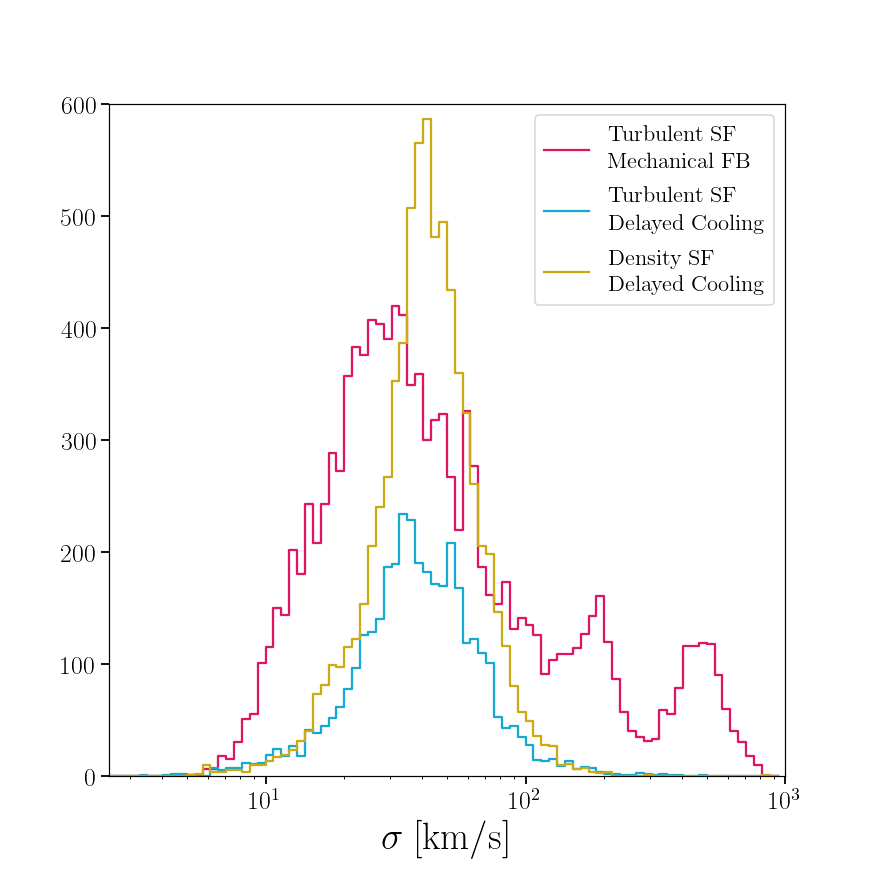

926.7780108557882 926.7780108557882


In [9]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_xscale("log")
ax.set_xlim([2.5,1e3])
ax.set_ylim([0,600])
ax.set_xlabel(r"$\rm \sigma\; [km/s]$",fontsize=25)


norm=0
arr1 = np.sqrt(SF1ME.st.sf_info.sigma2)
bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)
bins = np.logspace(0,3,100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='pre',c=sf1me,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Mechanical\;FB$")

arr1 = np.sqrt(SF1DE.st.sf_info.sigma2)
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='pre',c=sf1de,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")


arr1 = np.sqrt(SF0DE.st.sf_info.sigma2)
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

print np.nanmax(arr1), np.nanmax(arr1)
hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='pre',c=sf0de,label=r"$\rm Density\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")

legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=17, size=5,width=1.2)



<IPython.core.display.Javascript object>


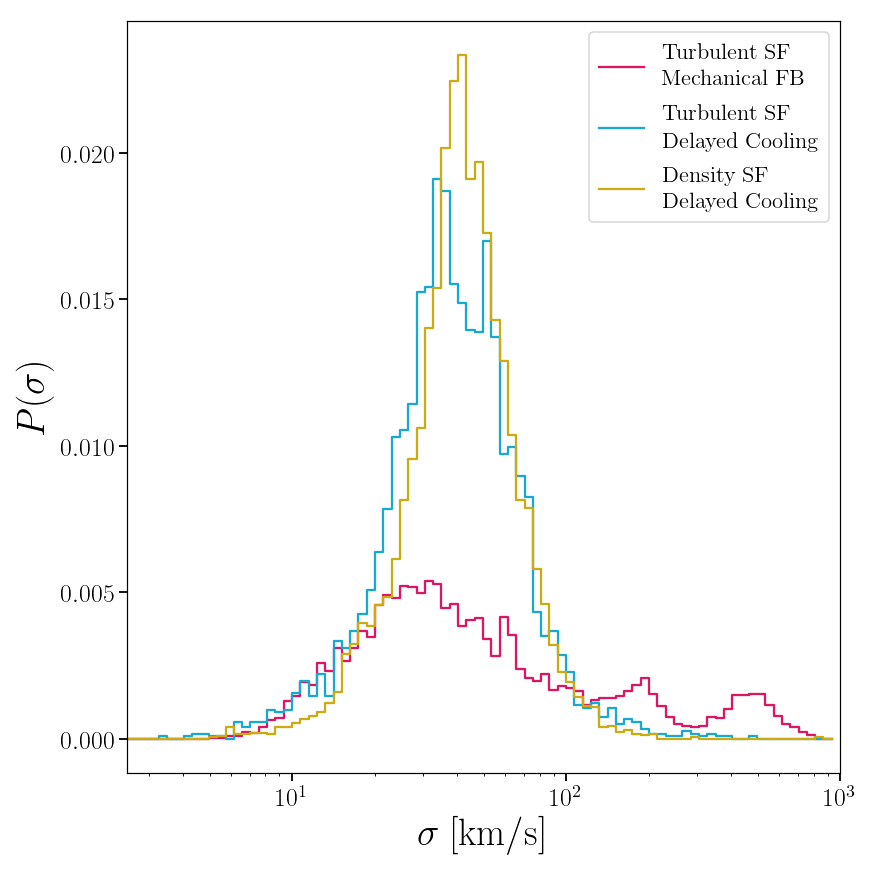

926.7780108557882 926.7780108557882


In [10]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_xscale("log")
ax.set_xlim([2.5,1e3])
#ax.set_ylim([0,600])
ax.set_xlabel(r"$\rm \sigma\; [km/s]$",fontsize=25)
ax.set_ylabel(r"$ P(\sigma)$",fontsize=25)


norm=1
arr1 = np.sqrt(SF1ME.st.sf_info.sigma2)
bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)
bins = np.logspace(0,3,100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='pre',c=sf1me,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Mechanical\;FB$")

arr1 = np.sqrt(SF1DE.st.sf_info.sigma2)
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='pre',c=sf1de,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")


arr1 = np.sqrt(SF0DE.st.sf_info.sigma2)
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

print np.nanmax(arr1), np.nanmax(arr1)
hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='pre',c=sf0de,label=r"$\rm Density\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")

legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=17, size=5,width=1.2)

plt.tight_layout()

# Mach number

<IPython.core.display.Javascript object>


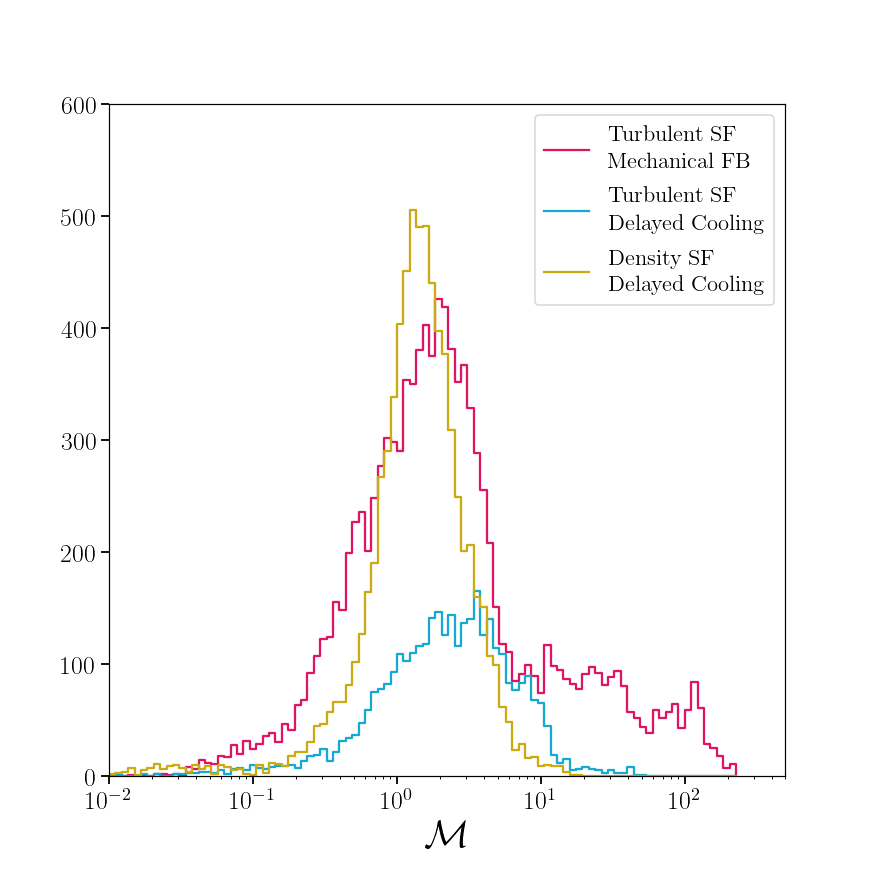

17.855861042225637 17.855861042225637


In [11]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_xscale("log")
ax.set_xlim([1e-2,5e2])
ax.set_ylim([0,600])
ax.set_xlabel(r"$\rm \mathcal{M}$",fontsize=25)


norm=0
arr1 = np.sqrt(SF1ME.st.sf_info.sigma2/SF1ME.st.sf_info.cs2)
bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)
bins = np.logspace(-2,2.4,100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='post',c=sf1me,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Mechanical\;FB$")

arr1 = np.sqrt(SF1DE.st.sf_info.sigma2/SF1DE.st.sf_info.cs2)
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='post',c=sf1de,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")


arr1 = np.sqrt(SF0DE.st.sf_info.sigma2/SF0DE.st.sf_info.cs2)
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

print np.nanmax(arr1), np.nanmax(arr1)
hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='post',c=sf0de,label=r"$\rm Density\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")

legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=17, size=5,width=1.2)



<IPython.core.display.Javascript object>


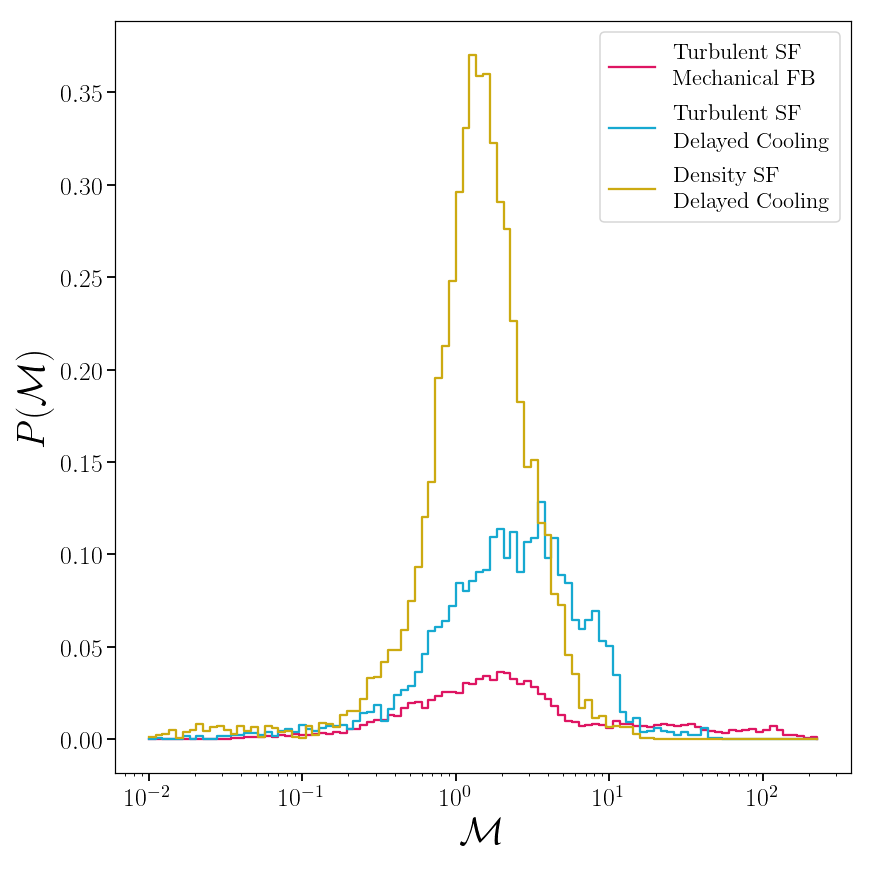

17.855861042225637 17.855861042225637


In [12]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_xscale("log")
#ax.set_xlim([1e-2,5e2])
ax.set_xlabel(r"$\rm \mathcal{M}$",fontsize=25)
ax.set_ylabel(r"$ P(\mathcal{M})$",fontsize=25)


norm=1
arr1 = np.sqrt(SF1ME.st.sf_info.sigma2/SF1ME.st.sf_info.cs2)
bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)
bins = np.logspace(-2,2.4,100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='post',c=sf1me,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Mechanical\;FB$")

arr1 = np.sqrt(SF1DE.st.sf_info.sigma2/SF1DE.st.sf_info.cs2)
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='post',c=sf1de,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")


arr1 = np.sqrt(SF0DE.st.sf_info.sigma2/SF0DE.st.sf_info.cs2)
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

print np.nanmax(arr1), np.nanmax(arr1)
hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='post',c=sf0de,label=r"$\rm Density\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")

legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=17, size=5,width=1.2)

plt.tight_layout()

# Density

<IPython.core.display.Javascript object>


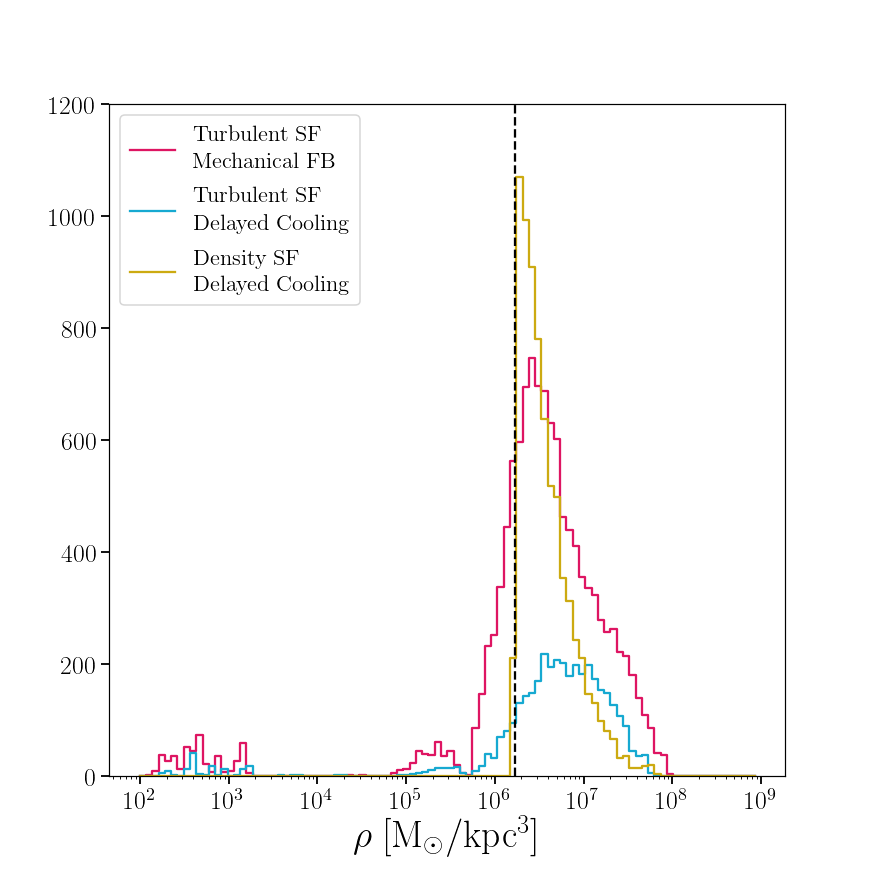

65937199.34817948 65937199.34817948


In [13]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_xscale("log")
#ax.set_xlim([2.5,1e3])
ax.set_ylim([0,1200])
ax.set_xlabel(r"$\rm \rho\; [M_{\odot}/kpc^3]$",fontsize=25)


norm=0
arr1 = SF1ME.st.sf_info.rho
bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)
bins = np.logspace(2,9,100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='post',c=sf1me,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Mechanical\;FB$")

arr1 = SF1DE.st.sf_info.rho
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='post',c=sf1de,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")


arr1 = SF0DE.st.sf_info.rho
#bins = np.logspace(np.log10(np.nanmin(arr1)),np.log10(np.nanmax(arr1)),100)

print np.nanmax(arr1), np.nanmax(arr1)
hist, bins = np.histogram(arr1,bins=bins,normed=norm)
ax.step(bins[:-1],hist,where='post',c=sf0de,label=r"$\rm Density\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")

legend = ax.legend(loc='upper left', ncol=1, shadow=False, fontsize=15)
ax.axvline(x=SF0DE.st.sf_info.rho.min(),c="k",ls="--")
ax.tick_params(axis='both', which='major', labelsize=17, size=5,width=1.2)

<IPython.core.display.Javascript object>


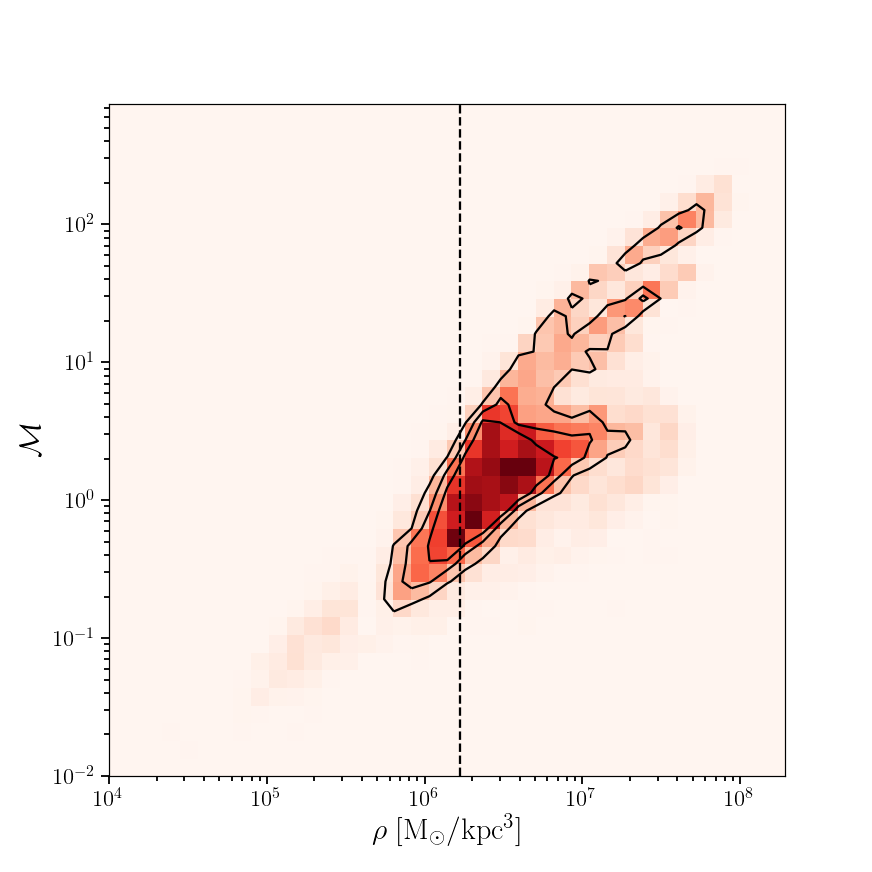

In [14]:
points=40
left,right=4,8.4
low,top=-2,3
xedges = np.logspace(left,right,points)
yedges = np.logspace(low,top,points)
M2 = SF1ME.st.sf_info.sigma2 / SF1ME.st.sf_info.cs2
H, xedges, yedges = np.histogram2d(SF1ME.st.sf_info.rho, 
                                   np.sqrt(M2),
                                   bins=(xedges, yedges))
Z1M = H.T

fig, ax = plt.subplots(figsize=[8,8])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\rm \rho \;[M_{\odot}/kpc^3]$',fontsize=20)
ax.set_ylabel(r'$\mathcal{M}$',fontsize=20)



ma1M = Z1M.max()

X1M, Y1M = np.meshgrid(xedges[:-1], yedges[:-1])

ax.pcolormesh(X1M,Y1M,Z1M,cmap="Reds")

CS2 = ax.contour(X1M, Y1M, Z1M,[0.2*ma1M,0.4*ma1M,0.6*ma1M],colors='k')
ax.axvline(x=SF0DE.st.sf_info.rho.min(),c="k",ls="--")
#ax.axvline(x=SF0.p.rhoc_SF,color='k',linestyle='--')
#ax.text(1.1*SF0.p.rhoc_SF, 1.7, "Threshold\ndensity")
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)


<IPython.core.display.Javascript object>


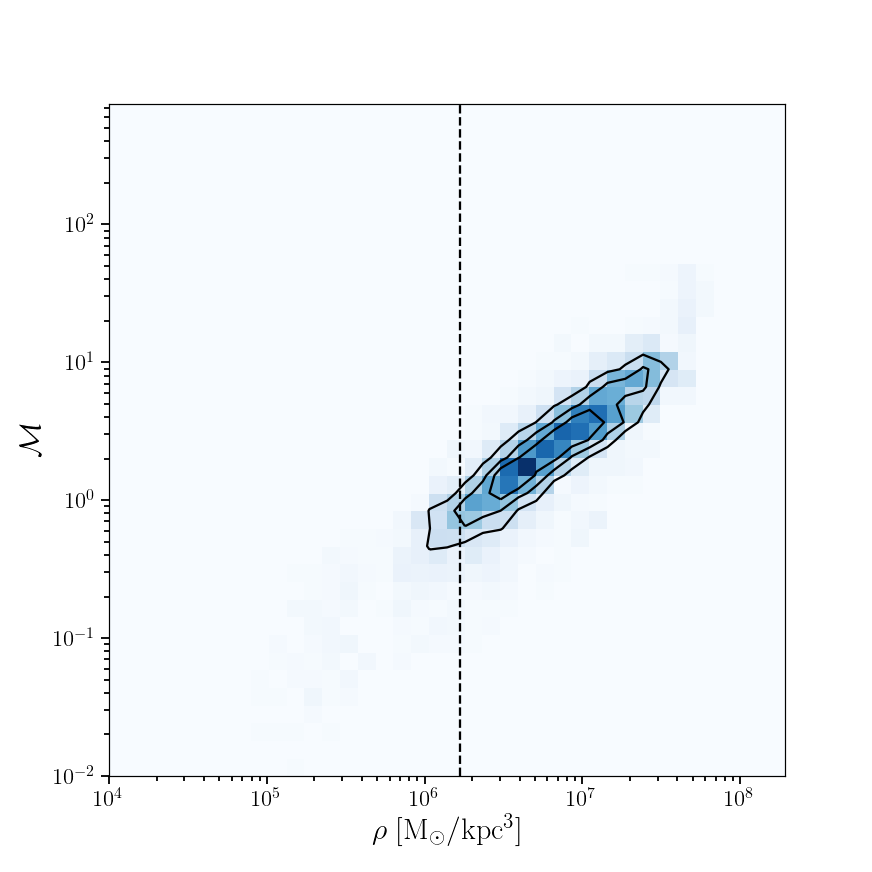

In [15]:
points=40
xedges = np.logspace(left,right,points)
yedges = np.logspace(low,top,points)
M2 = SF1DE.st.sf_info.sigma2 / SF1DE.st.sf_info.cs2
H, xedges, yedges = np.histogram2d(SF1DE.st.sf_info.rho, 
                                   np.sqrt(M2),
                                   bins=(xedges, yedges))
Z1D = H.T

fig, ax = plt.subplots(figsize=[8,8])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\rm \rho \;[M_{\odot}/kpc^3]$',fontsize=20)
ax.set_ylabel(r'$\mathcal{M}$',fontsize=20)

ax.axvline(x=SF0DE.st.sf_info.rho.min(),c="k",ls="--")

ma1D = Z1D.max()

X1D, Y1D = np.meshgrid(xedges[:-1], yedges[:-1])

ax.pcolormesh(X1D,Y1D,Z1D,cmap="Blues")

CS2 = ax.contour(X1D, Y1D, Z1D,[0.2*ma1D,0.4*ma1D,0.6*ma1D],colors='k')

#ax.axvline(x=SF0.p.rhoc_SF,color='k',linestyle='--')
#ax.text(1.1*SF0.p.rhoc_SF, 1.7, "Threshold\ndensity")
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)

<IPython.core.display.Javascript object>


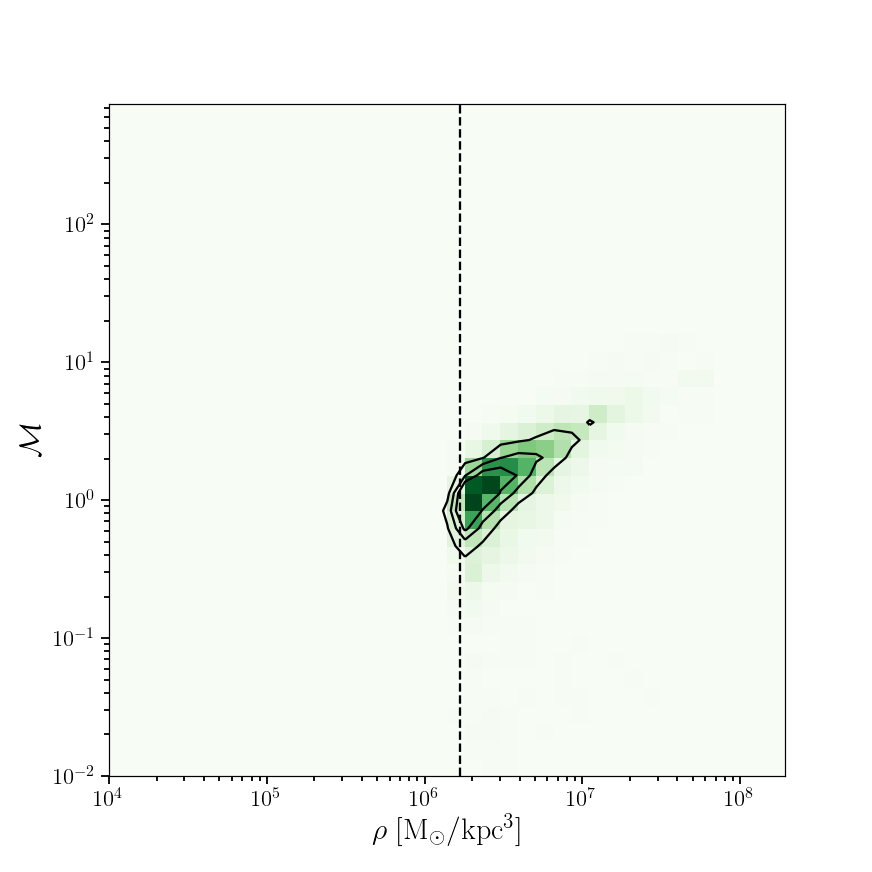

In [16]:
points=40
xedges = np.logspace(left,right,points)
yedges = np.logspace(low,top,points)
M2 = SF0DE.st.sf_info.sigma2 / SF0DE.st.sf_info.cs2
H, xedges, yedges = np.histogram2d(SF0DE.st.sf_info.rho, 
                                   np.sqrt(M2),
                                   bins=(xedges, yedges))
Z0D = H.T

fig, ax = plt.subplots(figsize=[8,8])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\rm \rho \;[M_{\odot}/kpc^3]$',fontsize=20)
ax.set_ylabel(r'$\mathcal{M}$',fontsize=20)



ma0D = Z0D.max()

X0D, Y0D = np.meshgrid(xedges[:-1], yedges[:-1])

ax.pcolormesh(X0D,Y0D,Z0D,cmap="Greens")

CS2 = ax.contour(X0D, Y0D, Z0D,[0.2*ma0D,0.4*ma0D,0.6*ma0D],colors='k')
ax.axvline(x=SF0DE.st.sf_info.rho.min(),c="k",ls="--")
#ax.axvline(x=SF0.p.rhoc_SF,color='k',linestyle='--')
#ax.text(1.1*SF0.p.rhoc_SF, 1.7, "Threshold\ndensity")

ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)


<IPython.core.display.Javascript object>


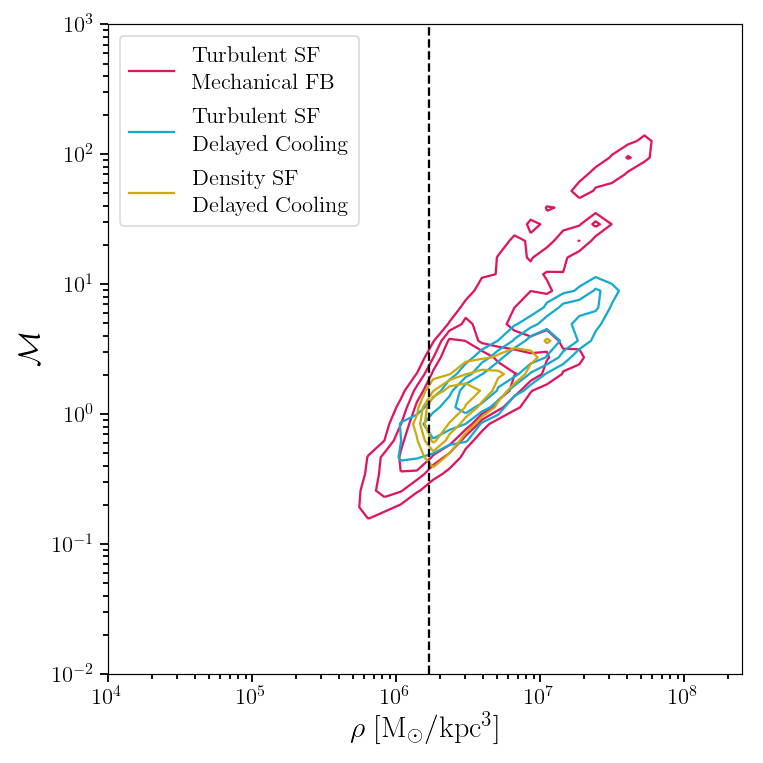

In [17]:
fig, ax =plt.subplots(figsize=[7,7])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10**left,10**right])
ax.set_ylim([10**low,10**top])

ax.contour(X1M, Y1M, Z1M,[0.2*ma1M,0.4*ma1M,0.6*ma1M],colors=sf1me,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Mechanical\;FB$")
ax.contour(X1D, Y1D, Z1D,[0.2*ma1D,0.4*ma1D,0.6*ma1D],colors=sf1de,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")
ax.contour(X0D, Y0D, Z0D,[0.2*ma0D,0.4*ma0D,0.6*ma0D],colors=sf0de,label=r"$\rm Density\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")
ax.set_xlabel(r'$\rm \rho \;[M_{\odot}/kpc^3]$',fontsize=20)
ax.set_ylabel(r'$\mathcal{M}$',fontsize=20)

ax.plot(2e300,2e300,color=sf1me,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Mechanical\;FB$")
ax.plot(2e300,2e300,color=sf1de,label=r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")
ax.plot(2e300,2e300,color=sf0de,label=r"$\rm Density\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$")
ax.axvline(x=SF0DE.st.sf_info.rho.min(),c="k",ls="--")
legend = ax.legend(loc='upper left', ncol=1, shadow=False, fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
plt.tight_layout()



<IPython.core.display.Javascript object>


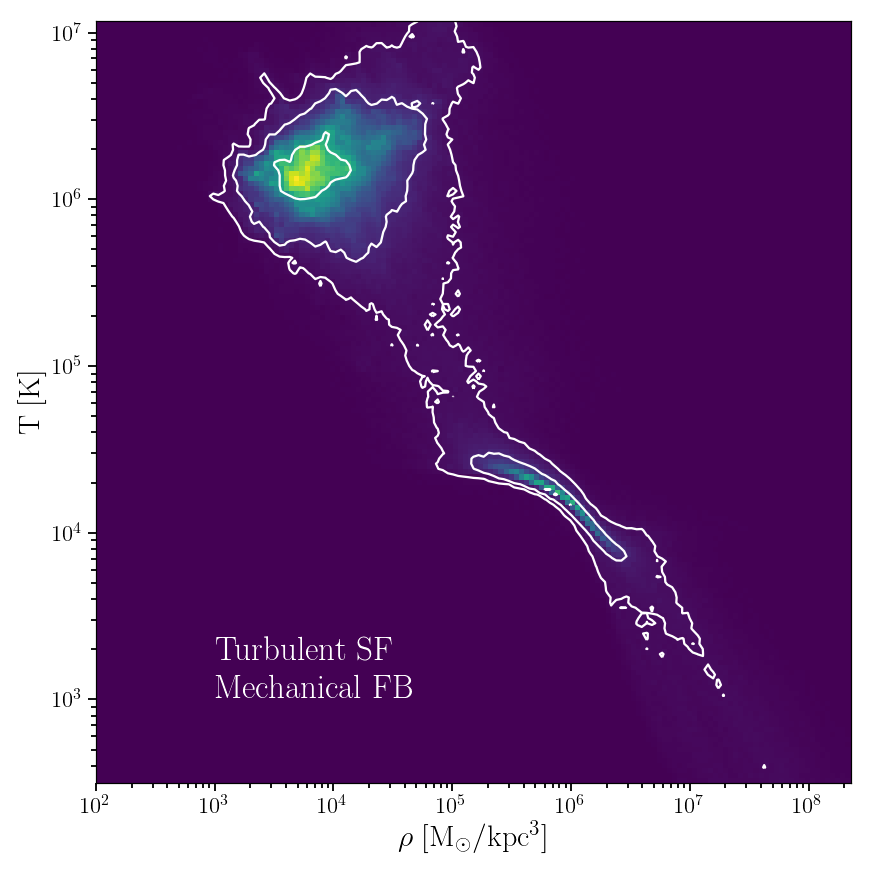

In [27]:
points=150
left,right=2,8.4
low,top=2.5,7.1
xedges = np.logspace(left,right,points)
yedges = np.logspace(low,top,points)
sim = SF1ME
H, xedges, yedges = np.histogram2d(sim.gs.rho, 
                                   sim.gs.temp,
                                   bins=(xedges, yedges))
Z1D = H.T

fig, ax = plt.subplots(figsize=[8,8])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\rm \rho \;[M_{\odot}/kpc^3]$',fontsize=20)
ax.set_ylabel(r'$\rm T\;[K]$',fontsize=20)

#ax.axvline(x=sim.st.sf_info.rho.min(),c="k",ls="--")

ma1D = Z1D.max()

X1D, Y1D = np.meshgrid(xedges[:-1], yedges[:-1])

ax.pcolormesh(X1D,Y1D,Z1D)

CS2 = ax.contour(X1D, Y1D, Z1D,[0.03*ma1D,0.1*ma1D,0.6*ma1D],colors='w')
ax.text(1e3,1e3,r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Mechanical\;FB$", fontsize=22,color='w')
#ax.plot(xedges,get_Tjean(1, xedges))
#ax.axvline(x=SF0.p.rhoc_SF,color='k',linestyle='--')
#ax.text(1.1*SF0.p.rhoc_SF, 1.7, "Threshold\ndensity")
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
plt.tight_layout()

<IPython.core.display.Javascript object>


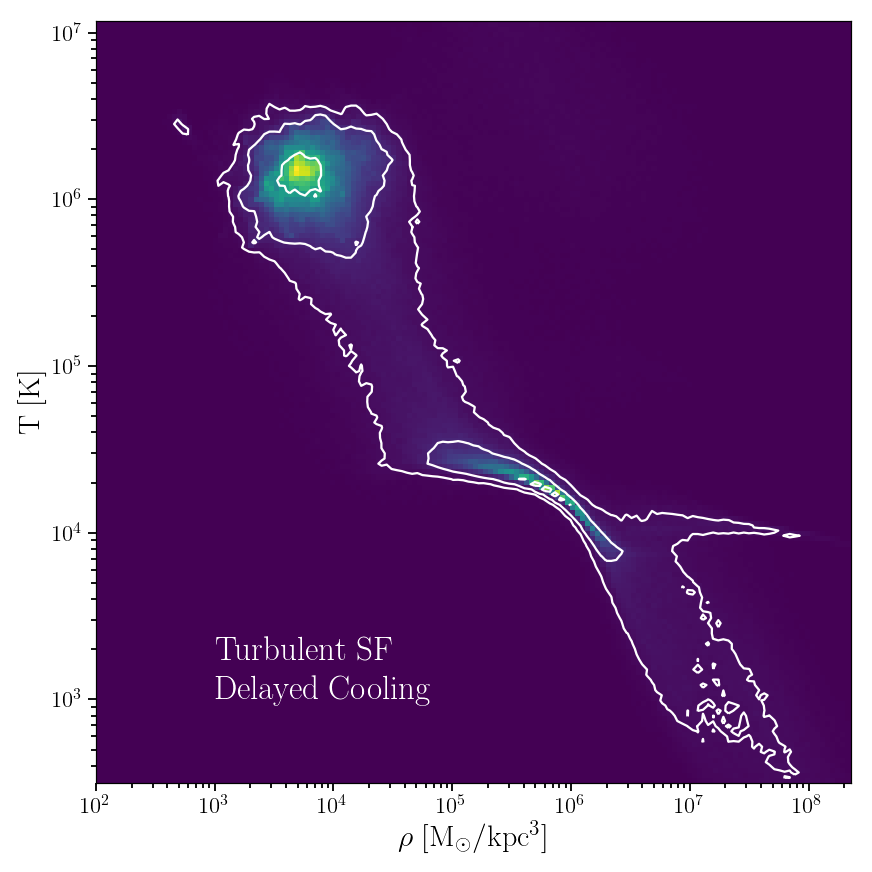

In [29]:
points=150
left,right=2,8.4
low,top=2.5,7.1
xedges = np.logspace(left,right,points)
yedges = np.logspace(low,top,points)
sim = SF1DE
H, xedges, yedges = np.histogram2d(sim.gs.rho, 
                                   sim.gs.temp,
                                   bins=(xedges, yedges))
Z1D = H.T

fig, ax = plt.subplots(figsize=[8,8])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\rm \rho \;[M_{\odot}/kpc^3]$',fontsize=20)
ax.set_ylabel(r'$\rm T\;[K]$',fontsize=20)

#ax.axvline(x=sim.st.sf_info.rho.min(),c="k",ls="--")

ma1D = Z1D.max()

X1D, Y1D = np.meshgrid(xedges[:-1], yedges[:-1])

ax.pcolormesh(X1D,Y1D,Z1D)

CS2 = ax.contour(X1D, Y1D, Z1D,[0.03*ma1D,0.1*ma1D,0.6*ma1D],colors='w')
ax.text(1e3,1e3,r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$", fontsize=22,color='w')
#ax.plot(xedges,get_Tjean(1, xedges))
#ax.axvline(x=SF0.p.rhoc_SF,color='k',linestyle='--')
#ax.text(1.1*SF0.p.rhoc_SF, 1.7, "Threshold\ndensity")
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
plt.tight_layout()

<IPython.core.display.Javascript object>


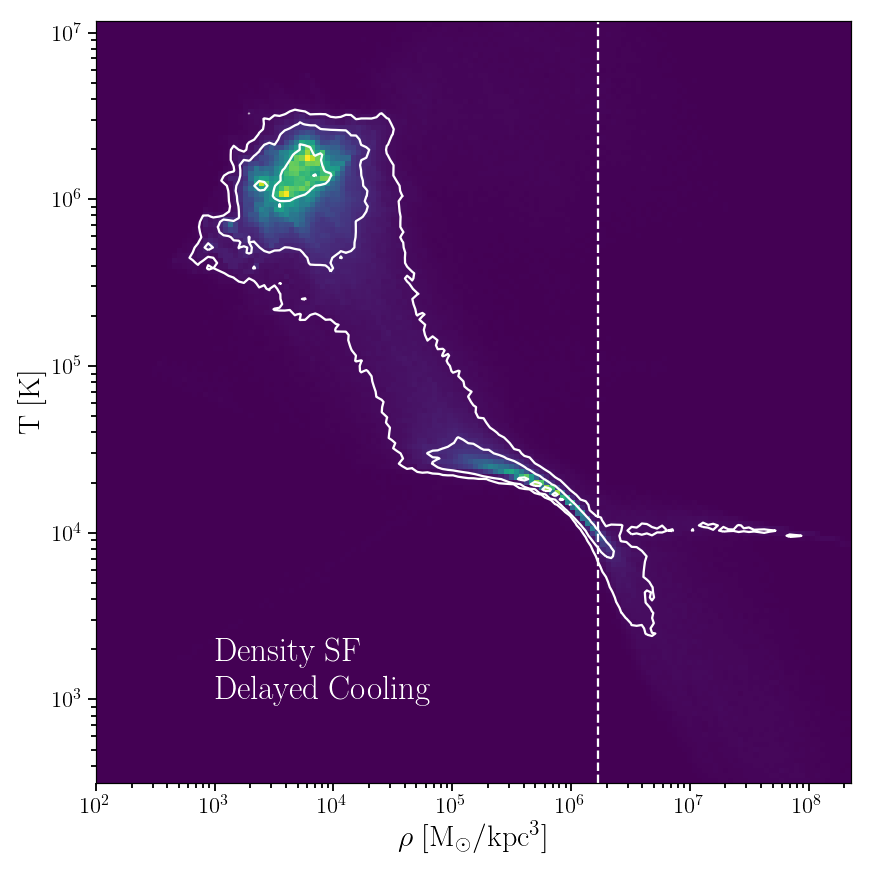

In [41]:
points=150
left,right=2,8.4
low,top=2.5,7.1
xedges = np.logspace(left,right,points)
yedges = np.logspace(low,top,points)
sim = SF0DE
H, xedges, yedges = np.histogram2d(sim.gs.rho, 
                                   sim.gs.temp,
                                   bins=(xedges, yedges))
Z1D = H.T

fig, ax = plt.subplots(figsize=[8,8])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\rm \rho \;[M_{\odot}/kpc^3]$',fontsize=20)
ax.set_ylabel(r'$\rm T\;[K]$',fontsize=20)

#ax.axvline(x=sim.st.sf_info.rho.min(),c="k",ls="--")

ma1D = Z1D.max()

X1D, Y1D = np.meshgrid(xedges[:-1], yedges[:-1])

ax.pcolormesh(X1D,Y1D,Z1D)

CS2 = ax.contour(X1D, Y1D, Z1D,[0.03*ma1D,0.1*ma1D,0.6*ma1D],colors='w')
ax.text(1e3,1e3,r"$\rm Density\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$", fontsize=22,color='w')
ax.axvline(x=SF0DE.st.sf_info.rho.min(),color='w',linestyle='--')
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
plt.tight_layout()

<IPython.core.display.Javascript object>


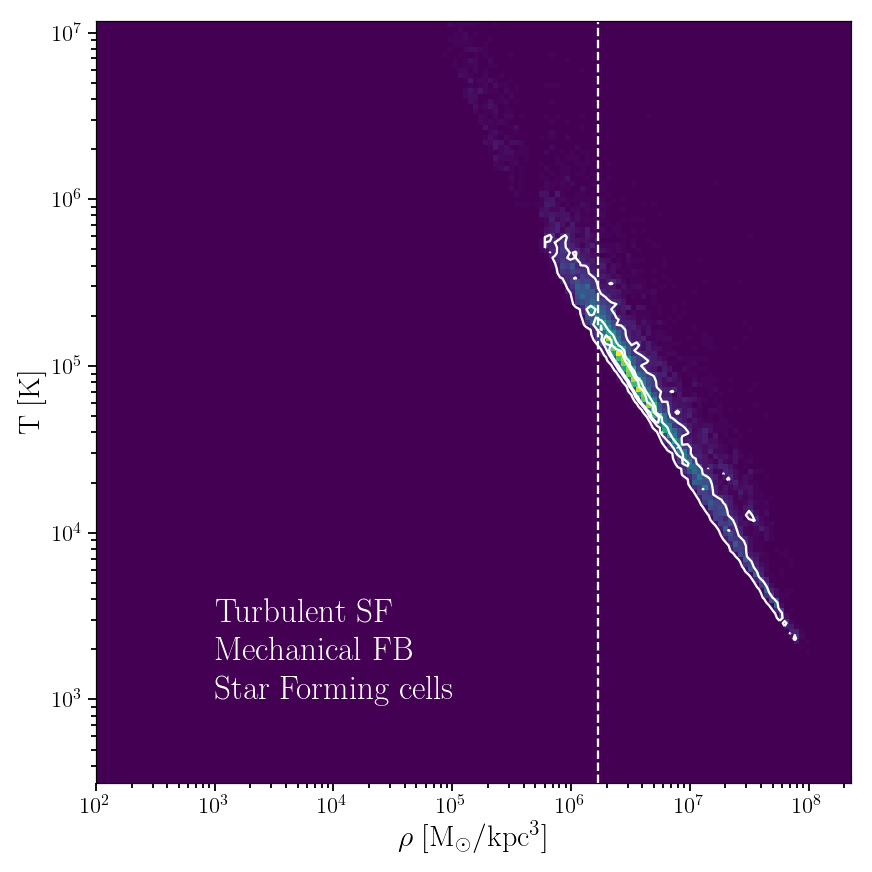

In [43]:
points=150
left,right=2,8.4
low,top=2.5,7.1
xedges = np.logspace(left,right,points)
yedges = np.logspace(low,top,points)
sim = SF1ME
H, xedges, yedges = np.histogram2d(sim.st.sf_info.rho, 
                                   sim.st.sf_info.temp*1e3,
                                   bins=(xedges, yedges))
Z1D = H.T

fig, ax = plt.subplots(figsize=[8,8])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\rm \rho \;[M_{\odot}/kpc^3]$',fontsize=20)
ax.set_ylabel(r'$\rm T\;[K]$',fontsize=20)

#ax.axvline(x=sim.st.sf_info.rho.min(),c="k",ls="--")

ma1D = Z1D.max()

X1D, Y1D = np.meshgrid(xedges[:-1], yedges[:-1])

ax.pcolormesh(X1D,Y1D,Z1D)

CS2 = ax.contour(X1D, Y1D, Z1D,[0.1*ma1D,0.4*ma1D,0.6*ma1D],colors='w')
ax.text(1e3,1e3,r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Mechanical\;FB$"+"\n"r"$\rm \;Star\;Forming \; cells$", fontsize=22,color='w')
ax.axvline(x=SF0DE.st.sf_info.rho.min(),color='w',linestyle='--')
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
plt.tight_layout()

<IPython.core.display.Javascript object>


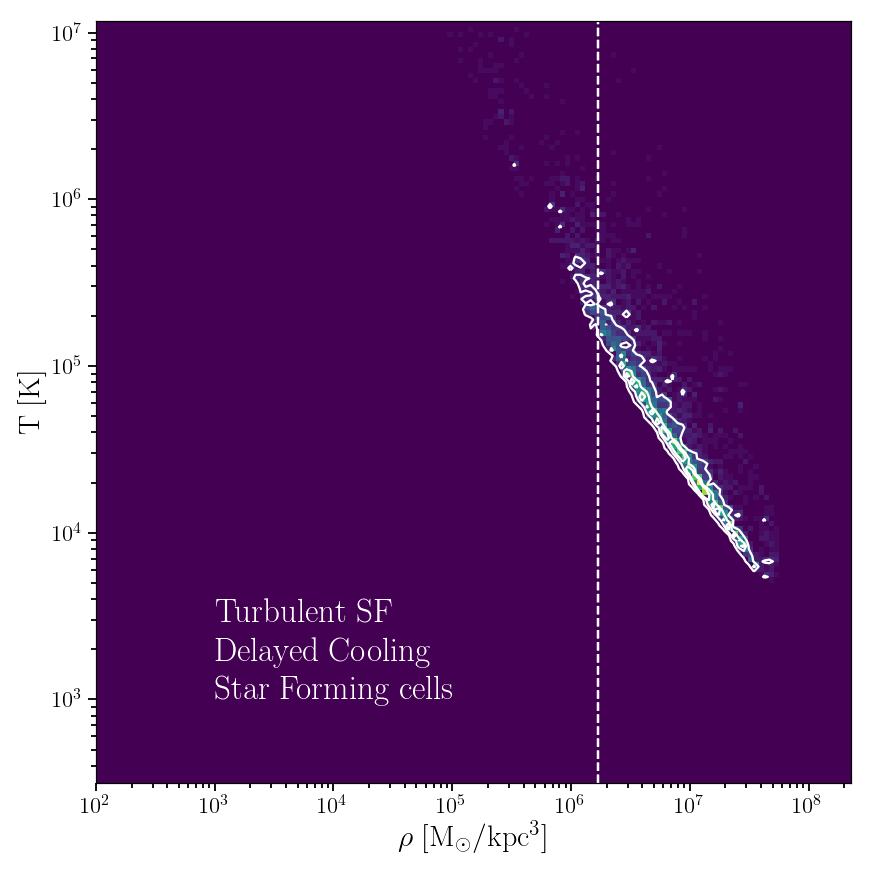

In [38]:
points=150
left,right=2,8.4
low,top=2.5,7.1
xedges = np.logspace(left,right,points)
yedges = np.logspace(low,top,points)
sim = SF1DE
H, xedges, yedges = np.histogram2d(sim.st.sf_info.rho, 
                                   sim.st.sf_info.temp*1e3,
                                   bins=(xedges, yedges))
Z1D = H.T

fig, ax = plt.subplots(figsize=[8,8])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\rm \rho \;[M_{\odot}/kpc^3]$',fontsize=20)
ax.set_ylabel(r'$\rm T\;[K]$',fontsize=20)

#ax.axvline(x=sim.st.sf_info.rho.min(),c="k",ls="--")

ma1D = Z1D.max()

X1D, Y1D = np.meshgrid(xedges[:-1], yedges[:-1])

ax.pcolormesh(X1D,Y1D,Z1D)

CS2 = ax.contour(X1D, Y1D, Z1D,[0.1*ma1D,0.4*ma1D,0.6*ma1D],colors='w')
ax.text(1e3,1e3,r"$\rm Turbulent\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$"+"\n"r"$\rm \;Star\;Forming \; cells$", fontsize=22,color='w')

ax.axvline(x=SF0DE.st.sf_info.rho.min(),color='w',linestyle='--')
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
plt.tight_layout()

<IPython.core.display.Javascript object>


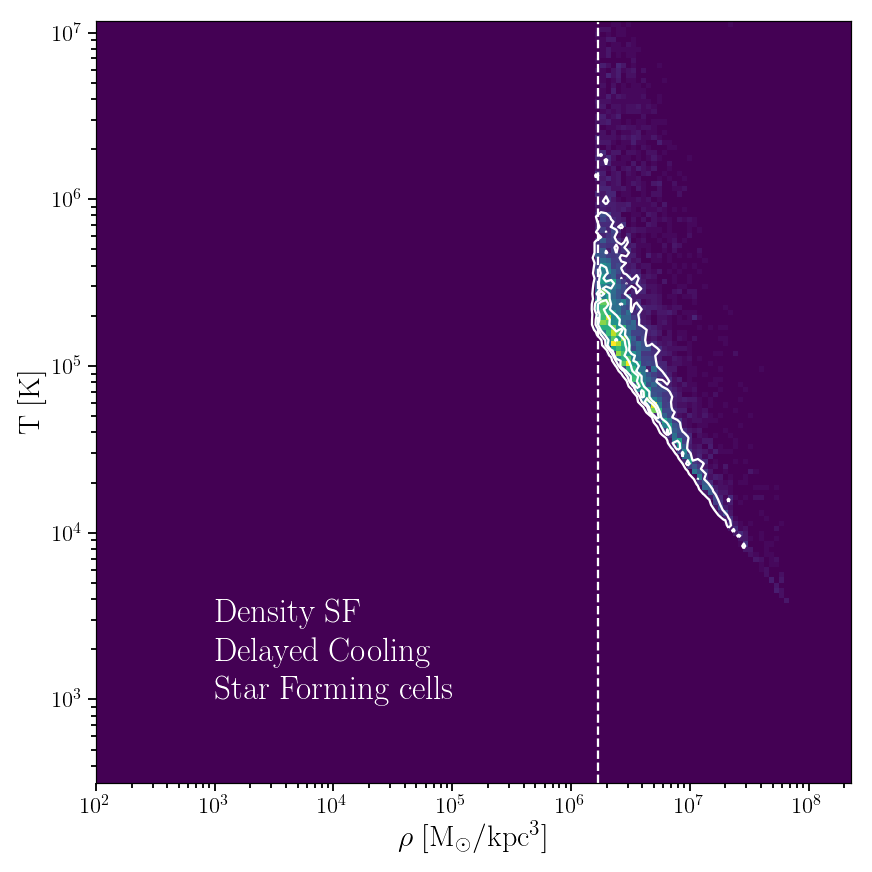

In [37]:
points=150
left,right=2,8.4
low,top=2.5,7.1
xedges = np.logspace(left,right,points)
yedges = np.logspace(low,top,points)
sim = SF0DE
H, xedges, yedges = np.histogram2d(sim.st.sf_info.rho, 
                                   sim.st.sf_info.temp*1e3,
                                   bins=(xedges, yedges))
Z1D = H.T

fig, ax = plt.subplots(figsize=[8,8])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\rm \rho \;[M_{\odot}/kpc^3]$',fontsize=20)
ax.set_ylabel(r'$\rm T\;[K]$',fontsize=20)

#ax.axvline(x=sim.st.sf_info.rho.min(),c="k",ls="--")

ma1D = Z1D.max()

X1D, Y1D = np.meshgrid(xedges[:-1], yedges[:-1])

ax.pcolormesh(X1D,Y1D,Z1D)

CS2 = ax.contour(X1D, Y1D, Z1D,[0.1*ma1D,0.4*ma1D,0.6*ma1D],colors='w')
ax.text(1e3,1e3,r"$\rm Density\;SF$"+"\n"r"$\rm \; Delayed\;Cooling$"+"\n"r"$\rm \;Star\;Forming \; cells$", fontsize=22,color='w')
#ax.plot(xedges,get_Tjean(1, xedges))
ax.axvline(x=SF0DE.st.sf_info.rho.min(),color='w',linestyle='--')
#ax.text(1.1*SF0.p.rhoc_SF, 1.7, "Threshold\ndensity")
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
plt.tight_layout()

In [44]:
sim = SF1ME


print  sim.st.age.min(), sim.st.age.max()

-2.0954797 -1.4827684


In [4]:
def get_it(sim):
    minn, maxx = sim.st.age.min()/sim.p.aexp**2, sim.st.age.max()/sim.p.aexp**2
    condition = (sim.st.r<0.2*sim.r200)
    bins = np.int(np.abs(np.int((minn-maxx)/0.04)))
    age_hist = np.histogram(sim.st.age[condition]/sim.p.aexp**2,bins=bins,weights=sim.st.mass[condition])
    return age_hist

In [5]:
def get_it(sim):
    minn, maxx = sim.st.age.min(), sim.st.age.max()
    condition = (sim.st.r<0.2*sim.r200)
    bins = np.int(np.abs(np.int((minn-maxx)/0.04)))
    age_hist = np.histogram(sim.st.age[condition],bins=bins)#,weights=sim.st.mass[condition])
    return age_hist

<IPython.core.display.Javascript object>


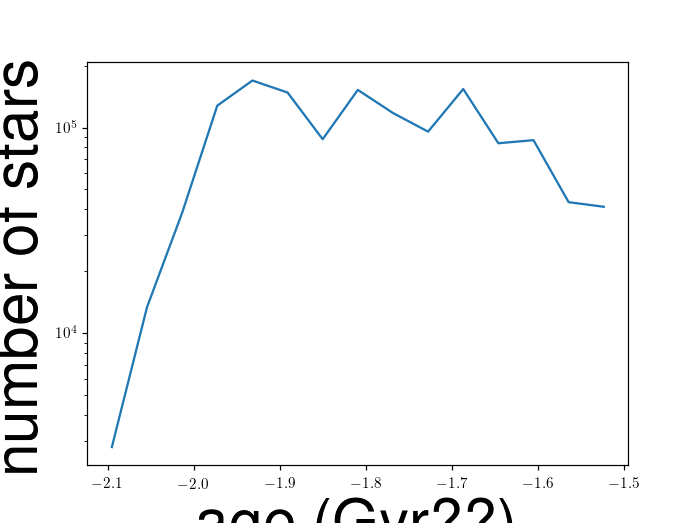

'\n\nage_hist = get_it(SF1DE)\nt = age_hist[1][1]-age_hist[1][0]\nax.plot(age_hist[1][:-1],age_hist[0])\nage_hist = get_it(SF0DE)\nt = age_hist[1][1]-age_hist[1][0]\nax.plot(age_hist[1][:-1],age_hist[0])\nplt.tight_layout()\n'

In [20]:
fig, ax = plt.subplots()
ax.set_xlabel("age (Gyr??)",fontsize=40)
ax.set_ylabel("number of stars",fontsize=40)

ax.set_yscale('log')
age_hist = get_it(SF1ME)
t = age_hist[1][1]-age_hist[1][0]
ax.plot(age_hist[1][:-1],age_hist[0])


"""

age_hist = get_it(SF1DE)
t = age_hist[1][1]-age_hist[1][0]
ax.plot(age_hist[1][:-1],age_hist[0])
age_hist = get_it(SF0DE)
t = age_hist[1][1]-age_hist[1][0]
ax.plot(age_hist[1][:-1],age_hist[0])
plt.tight_layout()
"""

In [34]:
print SF1DE.st.age.min()

-13.601549


<IPython.core.display.Javascript object>


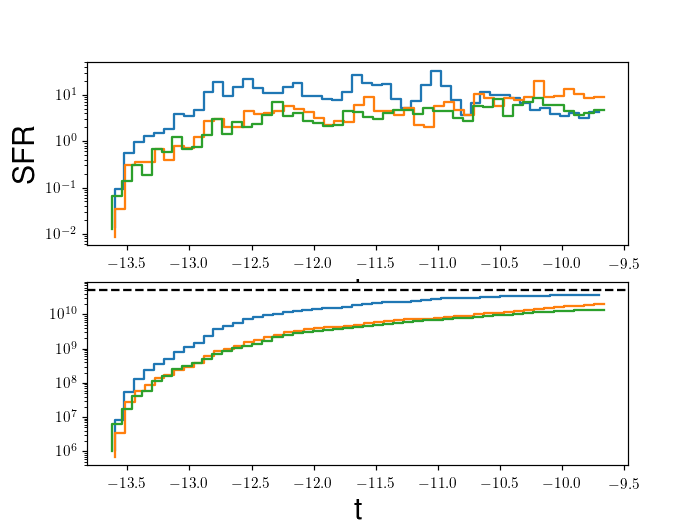

In [56]:
limit = 1
selec = np.where(SF1ME.st.r<limit*SF1ME.r200)
hist, bins = np.histogram(SF1ME.st.age[selec] / SF1ME.p.aexp**2,
                          bins=50, weights=SF1ME.st.mass[selec])
selec = np.where(SF1DE.st.r<limit*SF1DE.r200)

hist2, bins2 = np.histogram(SF1DE.st.age[selec],
                          bins=50, weights=SF1DE.st.mass[selec])
selec = np.where(SF0DE.st.r<limit*SF0DE.r200)

hist3, bins3 = np.histogram(SF0DE.st.age[selec],
                          bins=50, weights=SF0DE.st.mass[selec])

fig, [ax,ax1] = plt.subplots(2,1)
ax.set_xlabel("t",fontsize=20)
ax1.set_xlabel("t",fontsize=20)

ax.set_ylabel("SFR ",fontsize=20)
#ax1.set_ylabel("M_star",fontsize=20)

ax.set_yscale('log')
ax1.set_yscale('log')

ax.step(bins[:-1], hist/(bins[1]-bins[0])/1e9, where='pre')
ax.step(bins2[:-1], hist2/(bins2[1]-bins2[0])/1e9, where='pre')
ax.step(bins3[:-1], hist3/(bins3[1]-bins3[0])/1e9, where='pre')

ax1.axhline(y=5e10,c='k',ls='--')
ax1.step(bins[:-1], np.cumsum(hist), where='pre')
ax1.step(bins2[:-1], np.cumsum(hist2), where='pre')
ax1.step(bins3[:-1], np.cumsum(hist3), where='pre')

In [89]:
SF1ME.p.H0

67.7399978637695

<IPython.core.display.Javascript object>


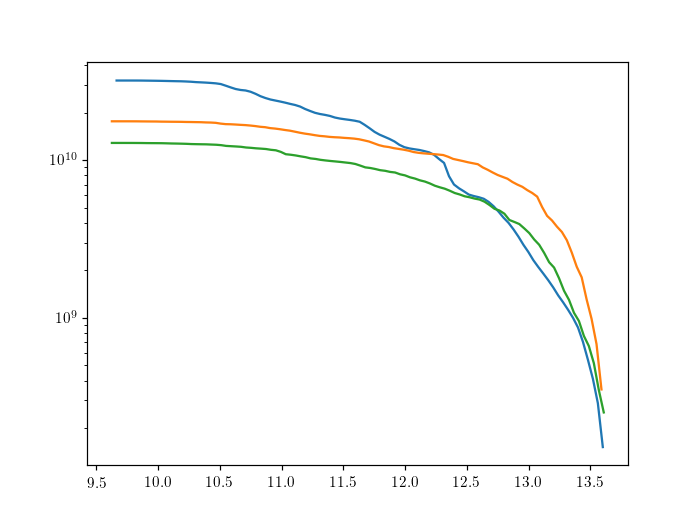

In [72]:
fig, ax = plt.subplots()
ax.set_yscale('log')
age_hist = get_it(SF1ME)
first = np.cumsum(age_hist[0][::-1])[-1]
ax.plot(-age_hist[1][:-1],np.cumsum(age_hist[0][::-1]))
age_hist = get_it(SF1DE)
second = np.cumsum(age_hist[0][::-1])[-1]
ch = np.abs(second-first)
ax.plot(-age_hist[1][:-1],np.cumsum(age_hist[0][::-1])-10)
age_hist = get_it(SF0DE)
ax.plot(-age_hist[1][:-1],np.cumsum(age_hist[0][::-1]))

In [50]:
vmod[0]


array([189.97680237, 350.90177498, 270.6703955 , ..., 293.26592405,
       400.05272493, 380.1749372 ])

In [82]:
pos_dm = np.array(SF1ME.dm.pos3d.reshape(len(SF1ME.dm.pos3d)*3),dtype=np.float32)
pos_gs = np.array(SF1ME.gs.pos3d.reshape(len(SF1ME.gs.pos3d)*3),dtype=np.float32)
pos_st = np.array(SF1ME.st.pos3d.reshape(len(SF1ME.st.pos3d)*3),dtype=np.float32)
pos = np.concatenate((pos_st, pos_gs))
phi = np.concatenate((SF1ME.st.phi, SF1ME.gs.phi))

mass = np.concatenate((SF1ME.st.mass,SF1ME.gs.mass))
v = np.concatenate((SF1ME.st.v,SF1ME.gs.v))
vphi = np.concatenate((SF1ME.st.vphi,SF1ME.gs.vphi))

print len(mass)*3, len(pos)
pos3d = pos.reshape(len(pos)/3,3)
r2 = pos3d[:,0]**2 + pos3d[:,1]**2 +pos3d[:,2]**2
R = np.sqrt(pos3d[:,0]**2 + pos3d[:,1]**2)

19765866 19765866


<IPython.core.display.Javascript object>


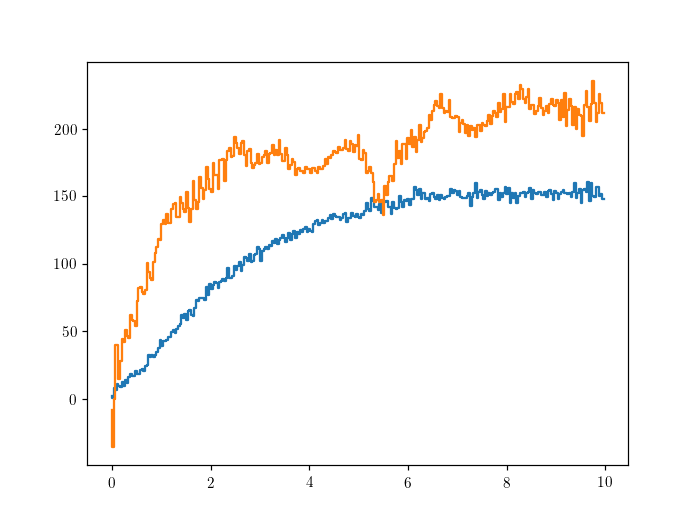

In [96]:
fig, ax = plt.subplots()


disc = np.where((SF1DE.st.r<15)&(np.abs(SF1DE.st.pos3d[:,2])<1.))
bins = np.linspace(0,10,300)
vphi,bins = np.histogram(SF1DE.st.R[disc],bins=bins,weights=SF1DE.st.vphi[disc])
nums,bins = np.histogram(SF1DE.st.R[disc],bins=bins)
ax.step(bins[:-1],vphi/nums)

disc = np.where((SF1DE.gs.r<15)&(np.abs(SF1DE.gs.pos3d[:,2])<1.))
bins = np.linspace(0,10,300)
vphi,bins = np.histogram(SF1DE.gs.R[disc],bins=bins,weights=SF1DE.gs.vphi[disc])
nums,bins = np.histogram(SF1DE.gs.R[disc],bins=bins)
ax.step(bins[:-1],vphi/nums)

<IPython.core.display.Javascript object>


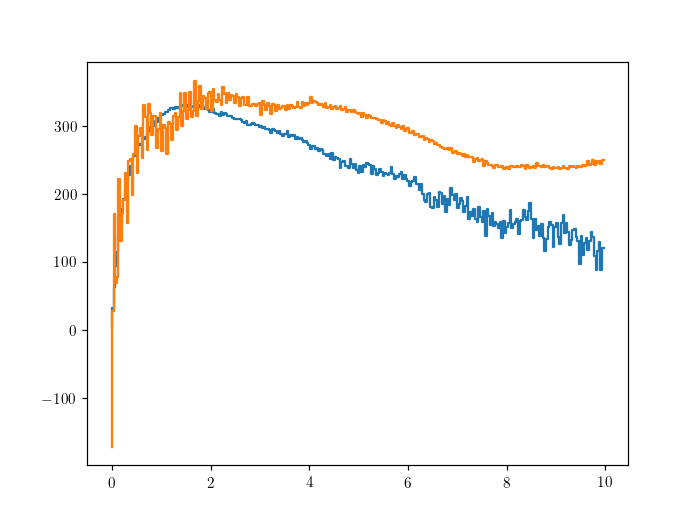

In [93]:
fig, ax = plt.subplots()


disc = np.where((SF1ME.st.r<15)&(np.abs(SF1ME.st.pos3d[:,2])<1.))
bins = np.linspace(0,10,300)
vphi,bins = np.histogram(SF1ME.st.R[disc],bins=bins,weights=SF1ME.st.vphi[disc])
nums,bins = np.histogram(SF1ME.st.R[disc],bins=bins)
ax.step(bins[:-1],vphi/nums)

disc = np.where((SF1ME.gs.r<15)&(np.abs(SF1ME.gs.pos3d[:,2])<1.))
bins = np.linspace(0,10,300)
vphi,bins = np.histogram(SF1ME.gs.R[disc],bins=bins,weights=SF1ME.gs.vphi[disc])
nums,bins = np.histogram(SF1ME.gs.R[disc],bins=bins)
ax.step(bins[:-1],vphi/nums)


<IPython.core.display.Javascript object>


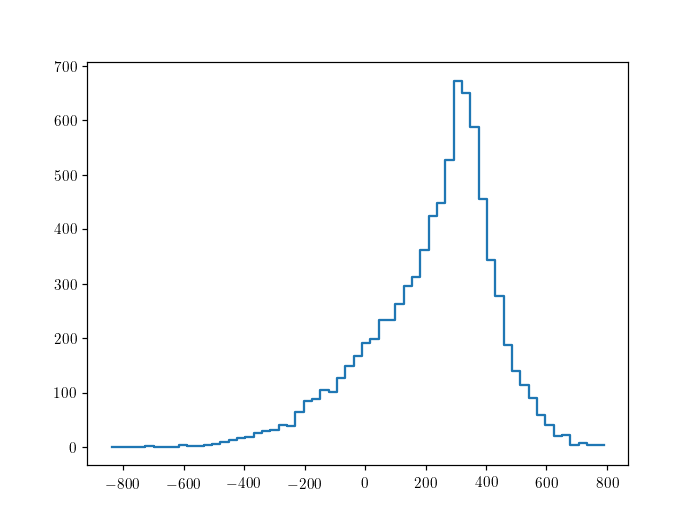

In [68]:
histo,bins=np.histogram(SF1ME.gs.vphi[disc],bins=60)
fig, ax = plt.subplots()

ax.step(bins[:-1],histo)

In [6]:
file = open("vcdata.dat")
R_mw = np.array([])
R_err = np.array([])
vc_mw = np.array([])
vc_err = np.array([])

for ln in file:
    #print ln
    row = ln.split('\t')
    if row[0][0]=='#':
        continue
    R_mw = np.append(R_mw, np.float(row[0]))
    R_err = np.append(R_err, row[1])
    vc_mw = np.append(vc_mw, np.float(row[2]))
    vc_err = np.append(vc_err, row[3])
print vc_err  


['4.5' '4.5' '4.5' ... '19.8466566348' '19.7816973913' '23.7338181969']


In [7]:
print R_mw

[ 2.07055236  2.20509885  2.33897364 ... 10.73355108 10.86593999
 12.54194195]


In [8]:
path = "/home/arturo/Documents/git/RotCurvs/SF1ME/SF1ME_z=5_rotcurv.dat"
name = path.split('/')[-1][:5]
print name
rotSF1DE = np.loadtxt(path,delimiter=',')

SF1ME


<IPython.core.display.Javascript object>


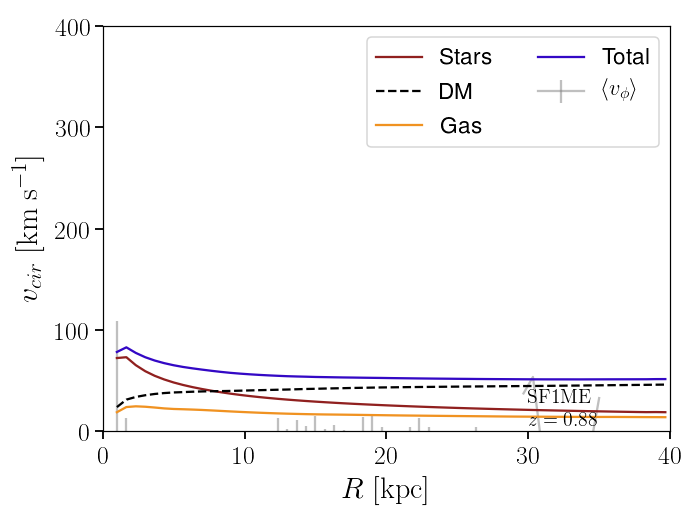

0


<IPython.core.display.Javascript object>


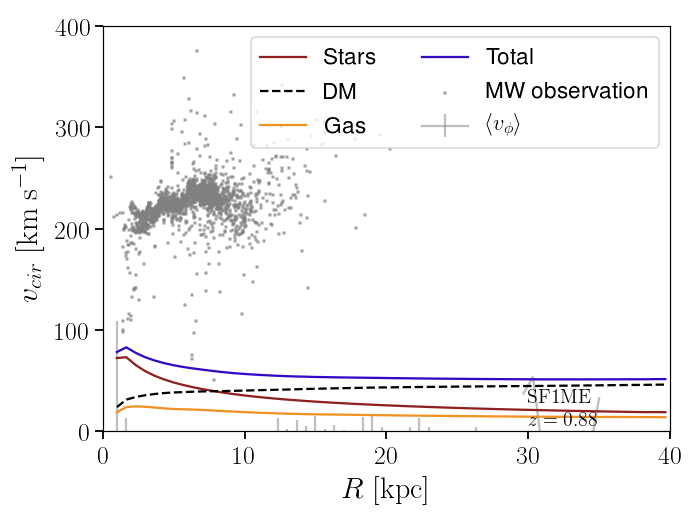

1


In [9]:


for i in range(2):
    fig, ax =plt.subplots()
    ax.set_xlabel(r"$R \rm \;[kpc]$",fontsize=20)
    ax.set_ylabel(r"$v_{cir} \rm \;[km \; s^{-1}]$",fontsize=20)
    ax.set_xlim([0,40])
    ax.set_ylim([0,400])
    print i
    #ax.errorbar(rotSF1DE[:,0],rotSF1DE[:,5],yerr=rotSF1DE[:,6])
    ax.errorbar(rotSF1DE[:,0],-rotSF1DE[:,7],yerr=rotSF1DE[:,8],color='gray',
                alpha=0.5,zorder=0,label=r"$\langle v_{\phi} \rangle$ ")
    if i==1:
        ax.scatter(R_mw,vc_mw,color='gray',marker='s',alpha=0.5,s=2,label="MW observation")

    ax.plot(rotSF1DE[:,0],rotSF1DE[:,1],c="#90201f",label="Stars")
    ax.plot(rotSF1DE[:,0],rotSF1DE[:,2],c='k',ls='--',label="DM")
    ax.plot(rotSF1DE[:,0],rotSF1DE[:,3],c="#f09221",label="Gas")

    ax.plot(rotSF1DE[:,0],rotSF1DE[:,4],c="#3308c5",label="Total")

    ax.text(30,5,r"$\rm "+name+"$"+"\n"+r"$z=0.88$",fontsize=13)
    legend = ax.legend(loc='upper right', ncol=2, shadow=False, fontsize=15)

    ax.tick_params(axis='both', which='major', labelsize=17, size=5,width=1.2)

    plt.tight_layout()
    """
    if i==0:
        plt.savefig("/home/arturo/Documents/LAM/SIM_Movies/SGS/Rotartion_curve_"+name+".pdf")
        plt.savefig("/home/arturo/Documents/LAM/SIM_Movies/SGS/Rotartion_curve_"+name+".png")
    else:
        plt.savefig("/home/arturo/Documents/LAM/SIM_Movies/SGS/Rotartion_curve_"+name+"_with_MW.pdf")
        plt.savefig("/home/arturo/Documents/LAM/SIM_Movies/SGS/Rotartion_curve_"+name+"_with_MW.png")
    """    
        

<IPython.core.display.Javascript object>


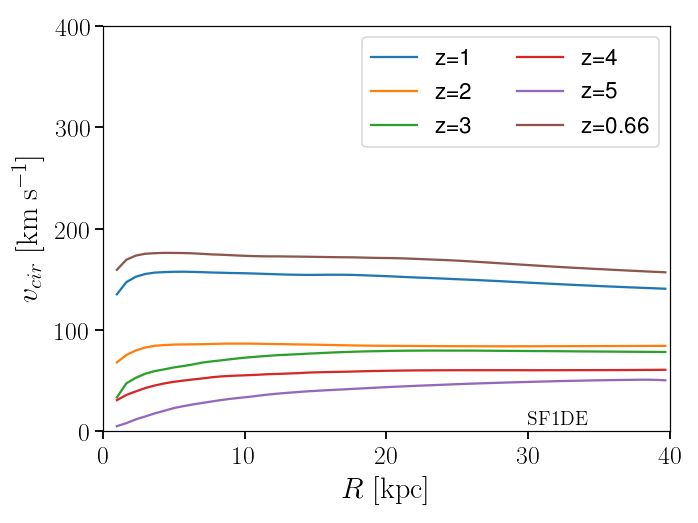

5


In [21]:

fig, ax =plt.subplots()
ax.set_xlabel(r"$R \rm \;[kpc]$",fontsize=20)
ax.set_ylabel(r"$v_{cir} \rm \;[km \; s^{-1}]$",fontsize=20)
ax.set_xlim([0,40])
ax.set_ylim([0,400])
print i
SIM = "SF1DE"
#ax.errorbar(rotSF1DE[:,0],rotSF1DE[:,5],yerr=rotSF1DE[:,6])
for i in range(1,6):
    path = "/home/arturo/Documents/git/RotCurvs/"+SIM+"/"+SIM+"_z="+str(i)+"_rotcurv.dat"
    name = path.split('/')[-1][:5]
    rotSF1DE = np.loadtxt(path,delimiter=',')
    ax.plot(rotSF1DE[:,0],rotSF1DE[:,4],label="z="+str(i))
#ax.errorbar(rotSF1DE[:,0],-rotSF1DE[:,7],yerr=rotSF1DE[:,8],color='gray',
#            alpha=0.5,zorder=0,label=r"$\langle v_{\phi} \rangle$ ")
path = "/home/arturo/Documents/git/RotCurvs/SF1DE/SF1DE_z=0.66_rotcurv.dat"
name = path.split('/')[-1][:5]
rotSF1DE = np.loadtxt(path,delimiter=',')
ax.plot(rotSF1DE[:,0],rotSF1DE[:,4],label="z=0.66")



ax.text(30,5,r"$\rm "+name+"$",fontsize=13)
legend = ax.legend(loc='upper right', ncol=2, shadow=False, fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=17, size=5,width=1.2)

plt.tight_layout()
plt.savefig("/home/arturo/Documents/LAM/SIM_Movies/SGS/Rotartion_curve_"+name+"_z_evolution.png")